# Capstone Project 2: Lending Club

# Inferential Statistics

In [3]:
import pandas as pd #for building pandas dataframes for analysis
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np #fundamental package for scientific computing with Python

import matplotlib.pyplot as plt #for visualizations
import seaborn as sns #for neat visualizations
import scipy.stats as stats #large number of probability distributions and statistical functions
import statsmodels as sm #provides estimation of many different statistical models, tests and data exploration 

from ggplot import *
%matplotlib notebook
%matplotlib inline

from scipy import stats
import collections

In [4]:
#Cleaned Approved Data
approved1 = pd.read_csv('/Users/carolinerosefrensko/Downloads/data_wrangling_json/approved2018-08-14.csv')
approved1.head()

,loan_amnt,funded_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,term,dti,revol_bal,total_acc,loan_status_separated,verification_status_separated,grade_separated,home_ownership_separated,emp_length_separated,term_separated
0,33600.0,33600.0,10.78%,B,8 years,RENT,104000.0,Source Verified,Fully Paid,36 months,14.01,28475.0,31.0,1,1,2,0,8,1
1,18000.0,18000.0,19.48%,E,7 years,RENT,150000.0,Not Verified,Charged Off,60 months,9.39,14052.0,27.0,0,0,5,0,7,0
2,4225.0,4225.0,14.85%,C,5 years,RENT,35000.0,Source Verified,Charged Off,36 months,15.22,1058.0,6.0,0,1,3,0,5,1
3,7200.0,7200.0,9.17%,B,10+ years,MORTGAGE,50000.0,Not Verified,Fully Paid,36 months,19.25,9051.0,25.0,1,0,2,1,10,1
4,20200.0,20200.0,18.49%,D,4 years,RENT,60000.0,Source Verified,Charged Off,60 months,34.84,8284.0,16.0,0,1,4,0,4,0


In [5]:
approved1.describe()

,loan_amnt,funded_amnt,annual_inc,dti,revol_bal,total_acc,loan_status_separated,verification_status_separated,grade_separated,home_ownership_separated,emp_length_separated,term_separated
count,314890.000000,314890.000000,3.148900e+05,314890.000000,3.148900e+05,314890.000000,314890.000000,314890.000000,314890.000000,314890.000000,314890.000000,314890.000000
mean,14702.750484,14702.750484,7.606169e+04,18.933952,1.688141e+04,25.692499,0.779615,0.727248,2.766753,0.593576,5.714297,0.743657
std,8513.521232,8513.521232,7.226622e+04,8.757082,2.374461e+04,12.207924,0.414507,0.445375,1.320292,0.491166,3.744192,0.436614
min,1000.000000,1000.000000,1.200000e+03,0.000000,0.000000e+00,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,4.500000e+04,12.400000,6.122000e+03,17.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000
50%,12800.000000,12800.000000,6.500000e+04,18.370000,1.136100e+04,24.000000,1.000000,1.000000,3.000000,1.000000,6.000000,1.000000
75%,20000.000000,20000.000000,9.000000e+04,25.090000,2.031000e+04,33.000000,1.000000,1.000000,4.000000,1.000000,10.000000,1.000000
max,35000.000000,35000.000000,9.500000e+06,672.520000,2.904836e+06,169.000000,1.000000,1.000000,7.000000,1.000000,10.000000,1.000000


In [6]:
#Cleaned Approved Data Separated
approved2 = pd.read_csv('/Users/carolinerosefrensko/Downloads/data_wrangling_json/approved22018-08-14.csv')
approved2.head()

,loan_status_separated,verification_status_separated_0,verification_status_separated_1,grade_separated_1,grade_separated_2,grade_separated_3,grade_separated_4,grade_separated_5,grade_separated_6,grade_separated_7,home_ownership_separated_0,home_ownership_separated_1,emp_length_separated_0,emp_length_separated_1,emp_length_separated_10,emp_length_separated_2,emp_length_separated_3,emp_length_separated_4,emp_length_separated_5,emp_length_separated_6,emp_length_separated_7,emp_length_separated_8,emp_length_separated_9,term_separated_0,term_separated_1
0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


## Heat Map

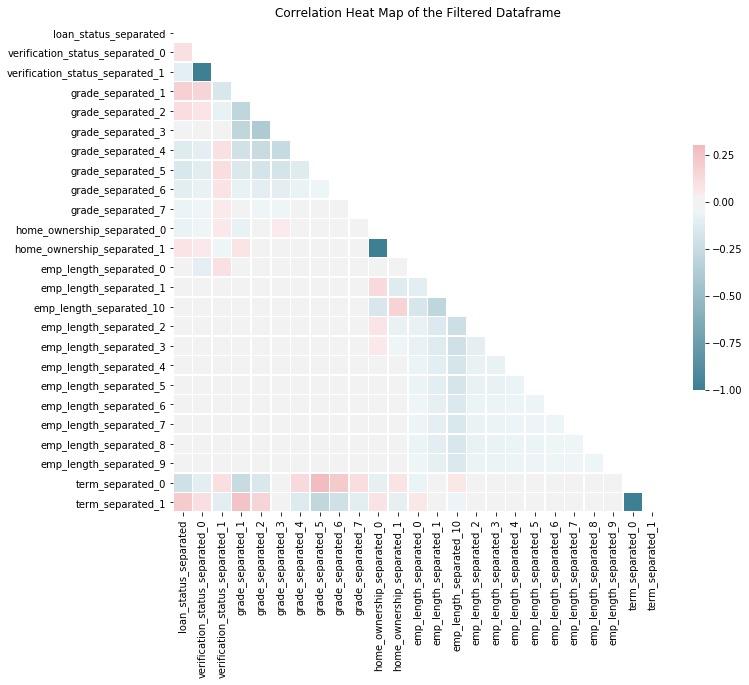

In [7]:
corr = approved2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heat Map of the Filtered Dataframe')
plt.show()

In [8]:
corr_matrix = approved2.corr()
corr_matrix["loan_status_separated"].sort_values(ascending=False)

loan_status_separated              1.000000
term_separated_1                   0.205805
grade_separated_1                  0.179908
grade_separated_2                  0.108963
verification_status_separated_0    0.095957
home_ownership_separated_1         0.069278
emp_length_separated_10            0.020942
emp_length_separated_2             0.001727
emp_length_separated_6             0.001593
emp_length_separated_3             0.001013
emp_length_separated_5             0.000440
emp_length_separated_7             0.000418
emp_length_separated_9            -0.000198
emp_length_separated_4            -0.000315
emp_length_separated_8            -0.000809
emp_length_separated_1            -0.005043
grade_separated_3                 -0.031711
emp_length_separated_0            -0.039078
grade_separated_7                 -0.057613
home_ownership_separated_0        -0.069278
verification_status_separated_1   -0.095957
grade_separated_6                 -0.111288
grade_separated_4               

## Hypothesis Testing

### Examining Home Ownership in Approved Good and Bad Loans

The end goal of performing a hypothsis test is to evaluate the variability of home ownership within the different loan status's in this data set. The two sample test test is applied to compare whether the average difference between the two groups is really significant or if it is due instead to random chance. 

In this scenario since there is a large sample size with a binomial population ('1' and '0') but the standard deviation is unknown, we should use a 2-sample t-test. With the large data set (>30) we can assume the means are normally distributed across the sample and the central limit theorem applies to this problem.

In the dataset provided, each row represents a loan. The 'loan status separated' column has two values, '1' and '0', indicating good loan(paid/current) and bad loan (charged off/default). The column 'home ownership' has 2 values, 1 and 0, indicating whether the person taking the loan owns their home (1 being a home owner 0 being a renter or other). The end goal is to evaluate if loan status impacts the home ownership in this collected sample.

The Null Hypothesis: Approved Good and Bad loans have the same home ownership values.  

The Alternative Hypothesis: Approved Good and Bad loans have different home ownership values.

### Compute margin of error, confidence interval, and p-value

In [9]:
# Separate into two datasets
g = approved1[approved1.loan_status_separated== 1]
b = approved1[approved1.loan_status_separated== 0]

# Number of loans
n_g = len(g)
n_b = len(b)

# Proportion of home ownership
prop_g = np.sum(g['home_ownership_separated']) / n_g
prop_b = np.sum(b['home_ownership_separated']) / n_b
print('Percentage of home_ownership for good_loans: ', prop_g)
print('Percentage of home_ownership for bad_loans: ', prop_b)

# Difference in proportion of home ownership
prop_diff = prop_g - prop_b
print('Difference in percentage of home ownership: ', prop_diff)

# T-score
t_stat, p = stats.ttest_ind(g['home_ownership_separated'],b['home_ownership_separated'],equal_var=False)
print('t-statistic: ', t_stat)
print('p-value: ', p)

# Standard error
s_error = np.sqrt(g['home_ownership_separated'].var()/n_g + b['home_ownership_separated'].var()/n_b)

# Margin of error = Critical value x Standard error of the statistic
m_error = 1.96 * s_error
print('Margin of error:', m_error)

# Confidence Interval
c_int = prop_diff + (np.array([-1, 1]) * m_error)
print('Confidence interval:', c_int)

# p-value
p_value = stats.norm.cdf(-t_stat) * 2
print('p-value:', p_value)

prop_g/prop_b

Percentage of home_ownership for good_loans:  0.6116671351117955
Percentage of home_ownership for bad_loans:  0.5295762064642564
Difference in percentage of home ownership:  0.08209092864753909
t-statistic:  38.4532392987
p-value:  0.0
Margin of error: 0.00418425659538
Confidence interval: [ 0.07790667  0.08627519]
p-value: 0.0


1.1550124942274569

### Frequentist Bootstrapping

Resample from the same dataframe with the assumption that there is no difference between the two proportions.

In [11]:
df = approved1[['loan_status_separated','home_ownership_separated']]

def get_prop_diff(sample1, sample2):
    
    prop_g = np.sum(sample1['home_ownership_separated'] == 1)/len(sample1)
    prop_b = np.sum(sample2['home_ownership_separated'] == 1)/len(sample2)
    
    return abs(prop_g-prop_b)
    
def get_bs_samples_diff(sample1, sample2, func, size):
    length1 = len(sample1)
    length2 = len(sample2)
    bs_prop_diffs = np.empty(size)
    
    for i in range(size):
        combined_sample = pd.concat([sample1,sample2])
        shuffled_sample = combined_sample.sample(length1+length2).reset_index(drop=True)

        new_sample1 = shuffled_sample.iloc[:length1,:]
        new_sample2 = shuffled_sample.iloc[length1:,:]
        
        bs_prop_diffs[i] = func(new_sample1,new_sample2)
        
    return bs_prop_diffs

In [12]:
bs_samples_diff = get_bs_samples_diff(df[approved1.loan_status_separated==1], 
                                      df[approved1.loan_status_separated==0], get_prop_diff, 1000)
print(bs_samples_diff[:5])

[ 0.00054782  0.00048724  0.00097293  0.00220619  0.00110232]


In [13]:
# p value
p = np.sum(bs_samples_diff > prop_diff)/len(bs_samples_diff)
print(p)

0.0


A 0 in 1,000 probability of getting a sample as extreme as the diffence that we see in our samples suggests there is an impact of home ownership on good vs. bad loans.

### Hypothesis Testing Assessment

After analysis on this data set it appears that home ownership has a significant value difference in good vs bad loans. The results from the tests show that the percentage of home ownership for good_loans is 61.17 percent and the percentage of home ownership for bad loans is 52.96 percent. This difference in percentage of home ownership is 8.2 percent. 

We performed a few tests to see if this difference could be perceived as random using a 2 sample t-test and frequentist bootstrapping. The p-value for the t-test and bootstrapping are both 0 so we can reject the null hypothesis. 

This would mean loan status is impacted by home ownership in this collected sample. There are however other variables (verification, grade, employment length, term) in the study that also should be taken into consideration in further investigation. 